In [3]:
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import os
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

> Reading the new CSV file which was created after appending all the CSV files

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datafinal/datafinal.csv


In [5]:
filename

'datafinal.csv'

> Reading the file

In [6]:
df=pd.read_csv('/kaggle/input/datafinal/datafinal.csv')

In [7]:
df

,Unnamed: 0,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,981,2017-09-22 14:29:28.788,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,982,2017-09-22 14:29:28.833,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,983,2017-09-22 14:29:28.940,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,984,2017-09-22 14:29:28.981,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42415 non-null  int64 
 1   Time        42415 non-null  object
 2   UNIX_T      42415 non-null  int64 
 3   RSSI1       42415 non-null  int64 
 4   RSSI2       42415 non-null  int64 
 5   RSSI3       42415 non-null  int64 
 6   Lux         42415 non-null  int64 
 7   Acc_x       42415 non-null  int64 
 8   Acc_y       42415 non-null  int64 
 9   Acc_z       42415 non-null  int64 
 10  Temp        42415 non-null  int64 
 11  ID          42415 non-null  int64 
 12  Pos         42415 non-null  int64 
 13  Si          42415 non-null  int64 
 14  Co          42415 non-null  int64 
 15  Ro          42415 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 5.2+ MB


In [9]:
df.describe()

,Unnamed: 0,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
count,42415.000000,4.241500e+04,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000
mean,492.699729,1.505969e+12,54.315525,62.180101,58.194271,52.624590,-1064.693764,-20.368855,101.711423,2923.327125,11.490204,187.346670,1.491854,3.556360,2.597642
std,284.754573,7.970035e+07,6.062302,6.382381,6.924730,59.824431,25.443554,33.623304,28.222796,5764.332709,6.347629,55.286146,0.499940,2.182479,2.167228
min,0.000000,1.505906e+12,26.000000,40.000000,13.000000,2.000000,-1115.000000,-70.000000,34.000000,-24439.000000,1.000000,111.000000,1.000000,1.000000,1.000000
25%,246.000000,1.505913e+12,51.000000,58.000000,55.000000,8.000000,-1088.000000,-47.000000,86.000000,2027.000000,6.000000,132.000000,1.000000,2.000000,1.000000
50%,493.000000,1.505917e+12,55.000000,62.000000,60.000000,29.000000,-1062.000000,-30.000000,102.000000,2094.000000,11.000000,199.000000,1.000000,3.000000,2.000000
75%,739.000000,1.506083e+12,58.000000,67.000000,63.000000,77.000000,-1050.000000,2.000000,117.000000,2160.000000,17.000000,233.000000,2.000000,5.000000,3.000000
max,989.000000,1.506092e+12,69.000000,76.000000,69.000000,218.000000,-1003.000000,85.000000,189.000000,28587.000000,22.000000,299.000000,2.000000,9.000000,9.000000


In [10]:
df.head()

,Unnamed: 0,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3


In [11]:
drop_cols = ['Unnamed: 0']
df = df.drop(drop_cols, axis=1)

In [12]:
df

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,2017-09-20 16:51:19.914,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,2017-09-20 16:51:19.969,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,2017-09-20 16:51:20.017,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,2017-09-20 16:51:20.066,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,2017-09-20 16:51:20.120,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,2017-09-22 14:29:28.788,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,2017-09-22 14:29:28.833,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,2017-09-22 14:29:28.940,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,2017-09-22 14:29:28.981,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    42415 non-null  object
 1   UNIX_T  42415 non-null  int64 
 2   RSSI1   42415 non-null  int64 
 3   RSSI2   42415 non-null  int64 
 4   RSSI3   42415 non-null  int64 
 5   Lux     42415 non-null  int64 
 6   Acc_x   42415 non-null  int64 
 7   Acc_y   42415 non-null  int64 
 8   Acc_z   42415 non-null  int64 
 9   Temp    42415 non-null  int64 
 10  ID      42415 non-null  int64 
 11  Pos     42415 non-null  int64 
 12  Si      42415 non-null  int64 
 13  Co      42415 non-null  int64 
 14  Ro      42415 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 4.9+ MB


In [14]:
df.shape

(42415, 15)

> Checking if there are any missing values

In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
UNIX_T    0
RSSI1     0
RSSI2     0
RSSI3     0
Lux       0
Acc_x     0
Acc_y     0
Acc_z     0
Temp      0
ID        0
Pos       0
Si        0
Co        0
Ro        0
dtype: int64

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# columns to select for encoding
selected_col = ['Time']

le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)

> Copying the Dataframe to **a** which is used in the model

In [17]:
a=df.copy()

In [18]:
df

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [19]:
a

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


# **DATA PLOTTING**

In [20]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

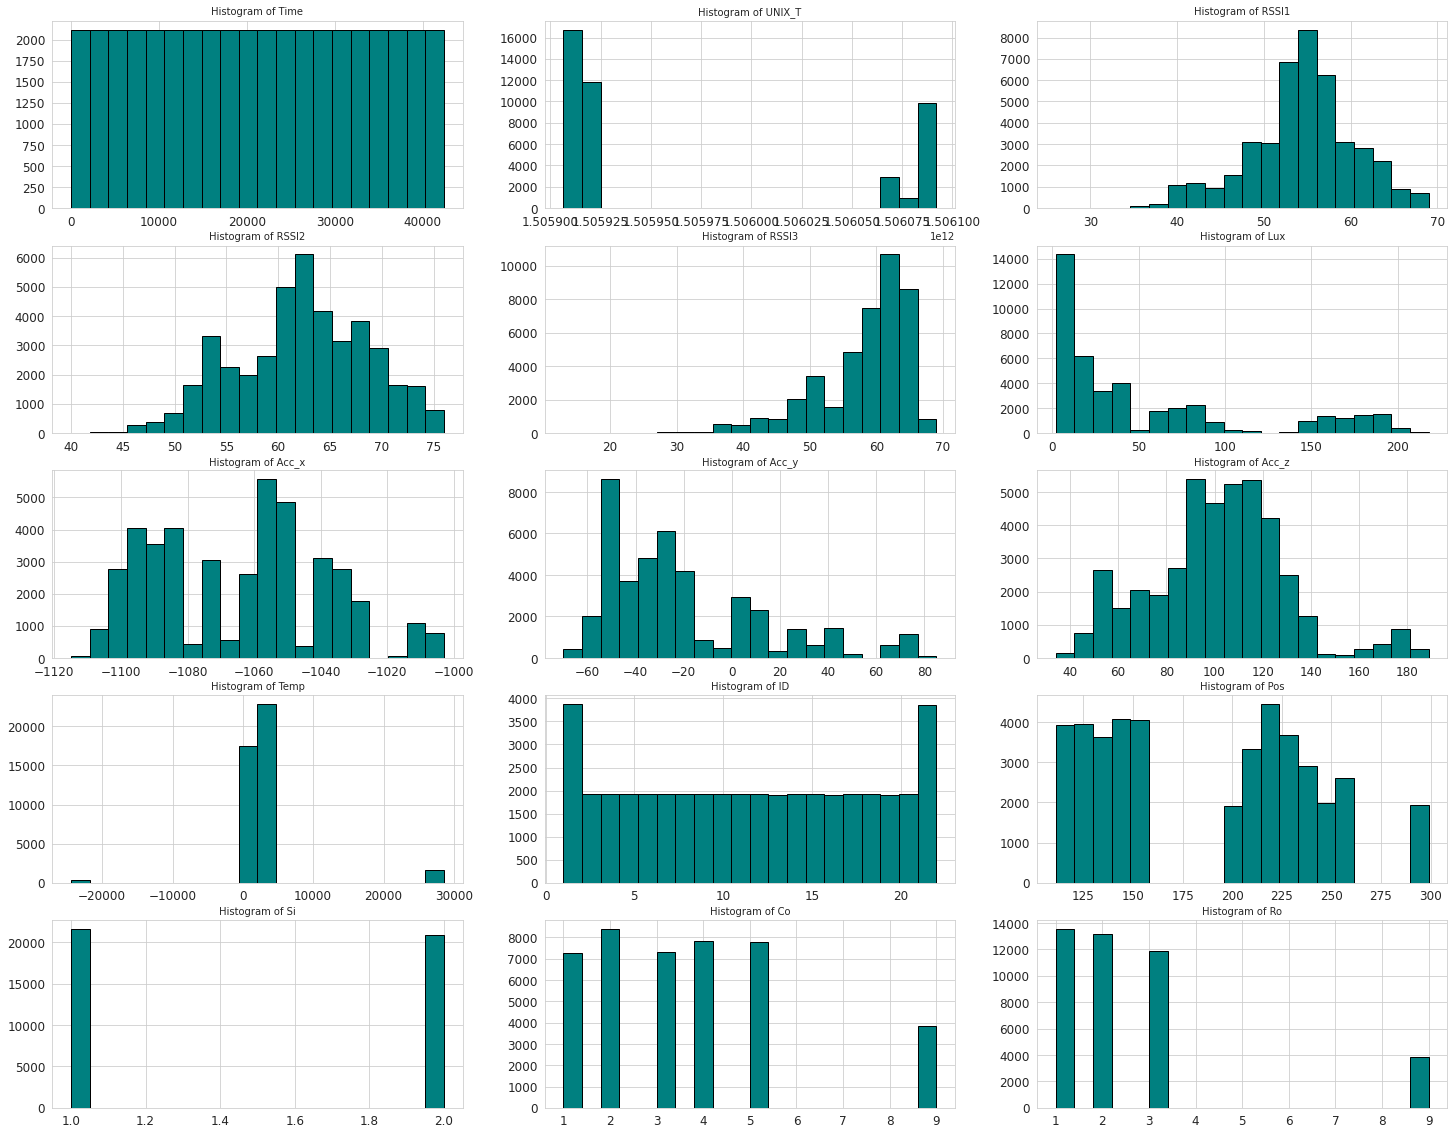

In [21]:

#All features distribution
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='teal',edgecolor='k')
    i+=1
plt.show()

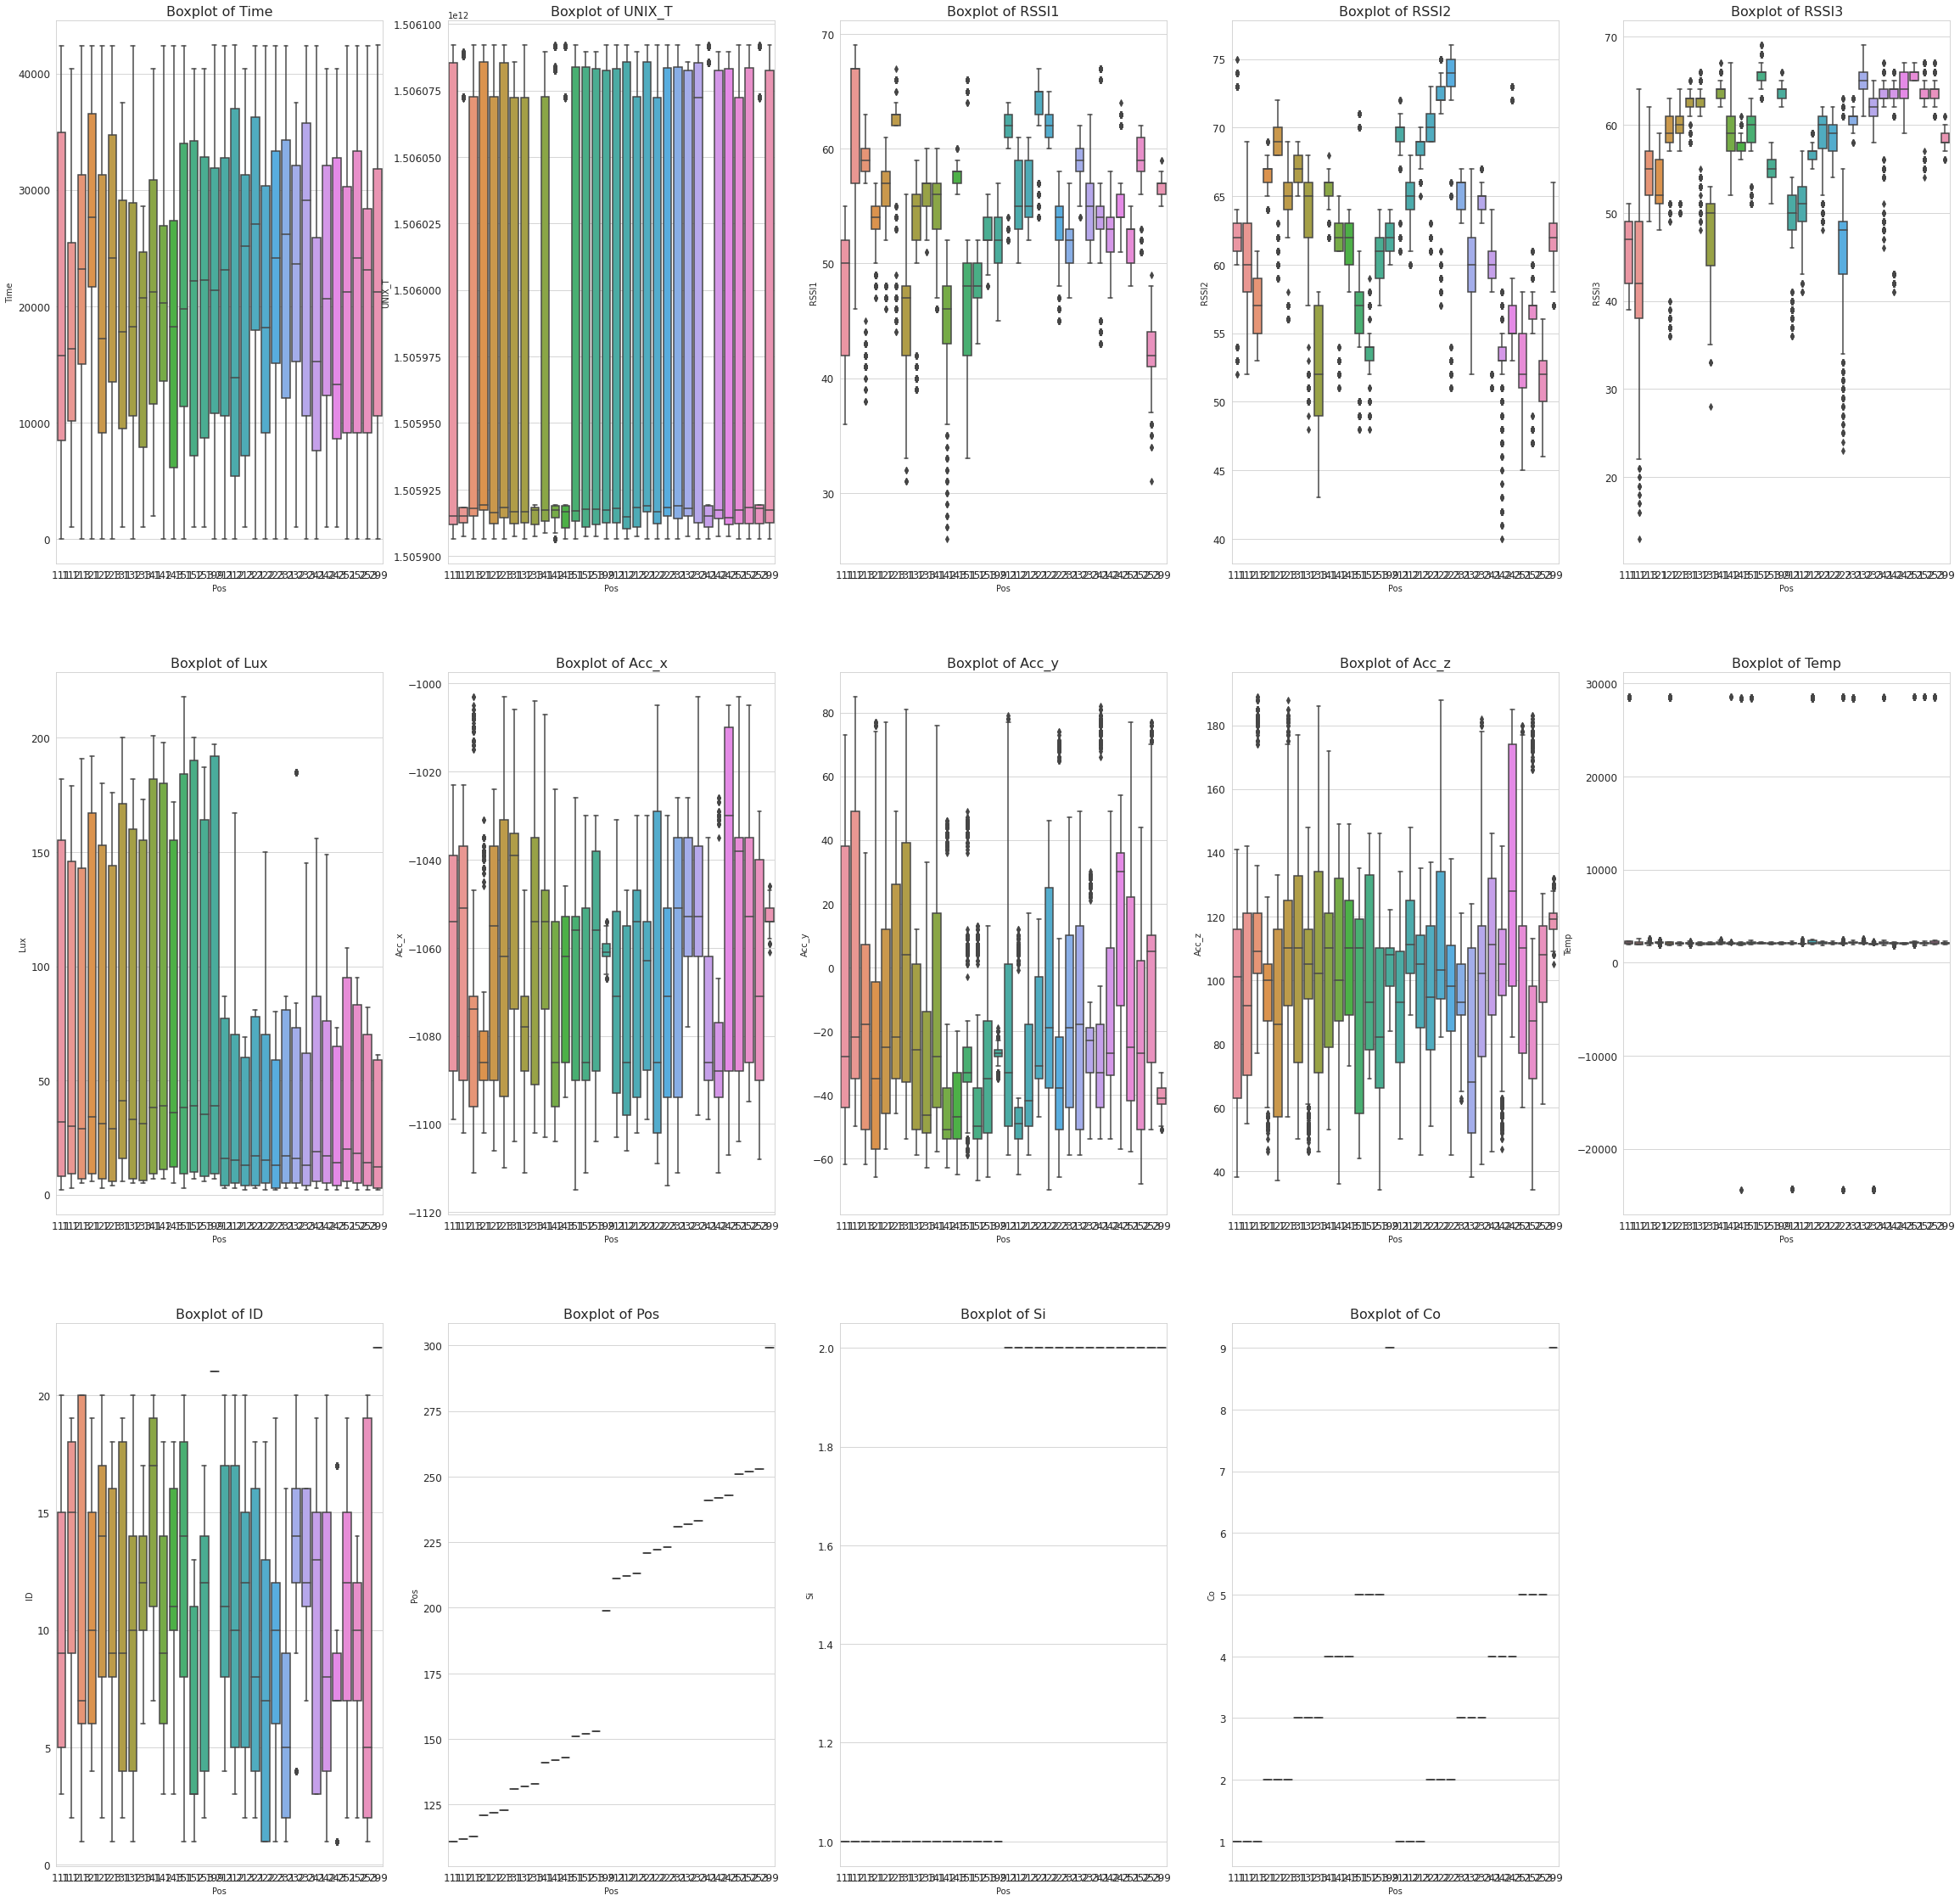

In [22]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:14]:
    plt.subplot(3,5,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Pos'])
    i+=1
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

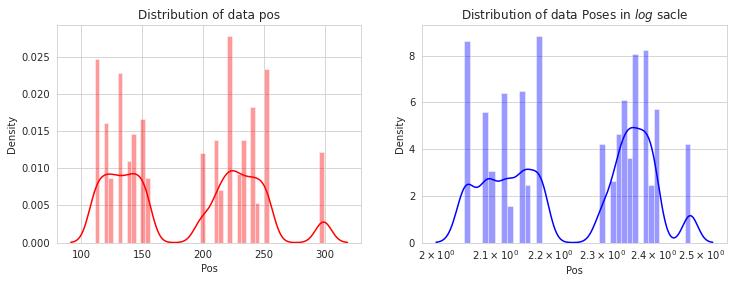

In [23]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['Pos'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of data pos')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['Pos']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of data Poses in $log$ sacle')
ax.set_xscale('log')
""

# **Feature Diagram**

In [24]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
a

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,123,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,122,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,132,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,113,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,141,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,222,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,242,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,199,1,9,9


In [26]:
y= a['Pos']

X = a.drop(['Pos'],axis = 1)

In [27]:
X

,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Si,Co,Ro
0,27604,1505919079914,63,67,63,6,-1102,-23,105,2145,1,1,2,3
1,27605,1505919079969,57,70,61,6,-1032,13,98,2168,2,1,2,2
2,27606,1505919080017,52,62,62,7,-1094,-50,142,2062,3,1,3,2
3,27607,1505919080066,61,58,58,5,-1072,5,121,2060,4,1,1,3
4,27608,1505919080120,57,67,59,2,-1050,-51,114,28542,5,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42410,33516,1506083368788,58,65,63,38,-1096,-51,121,2149,17,1,4,1
42411,33517,1506083368833,62,72,58,15,-1056,-35,119,2106,18,2,2,2
42412,33518,1506083368940,53,57,63,16,-1071,5,113,2115,20,2,4,2
42413,33519,1506083368981,48,61,64,39,-1063,-25,93,2150,21,1,9,9


In [28]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
rfc =RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)


RandomForestClassifier()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

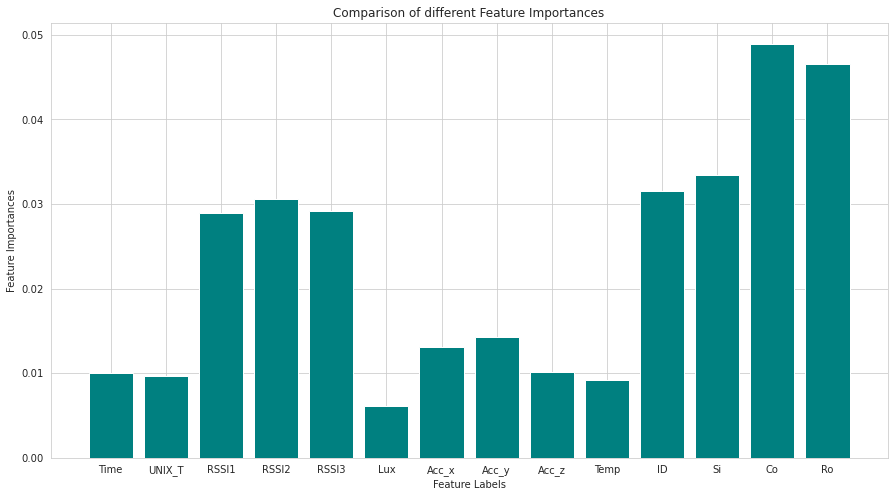

In [33]:
imp_features = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'teal') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

# I will need to do data cleaning if the result is overfitting

* UPDATE: OVERFITTING
* UPDATE: After setting 0.01 as min and 0.04 as max, overfitting is solved

In [34]:
#Data Cleaning
drop_cols = ['Time','UNIX_T','Lux','Temp','Co','Ro']
a = a.drop(drop_cols, axis=1)

In [35]:
a

,RSSI1,RSSI2,RSSI3,Acc_x,Acc_y,Acc_z,ID,Pos,Si
0,63,67,63,-1102,-23,105,1,123,1
1,57,70,61,-1032,13,98,2,122,1
2,52,62,62,-1094,-50,142,3,132,1
3,61,58,58,-1072,5,121,4,113,1
4,57,67,59,-1050,-51,114,5,213,2
...,...,...,...,...,...,...,...,...,...
42410,58,65,63,-1096,-51,121,17,141,1
42411,62,72,58,-1056,-35,119,18,222,2
42412,53,57,63,-1071,5,113,20,242,2
42413,48,61,64,-1063,-25,93,21,199,1


In [36]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RSSI1   42415 non-null  int64
 1   RSSI2   42415 non-null  int64
 2   RSSI3   42415 non-null  int64
 3   Acc_x   42415 non-null  int64
 4   Acc_y   42415 non-null  int64
 5   Acc_z   42415 non-null  int64
 6   ID      42415 non-null  int64
 7   Pos     42415 non-null  int64
 8   Si      42415 non-null  int64
dtypes: int64(9)
memory usage: 2.9 MB


>Feature Extraction, Importance & Splitting

In [37]:
y= a['Pos']

X = a.drop(['Pos'],axis = 1)

In [38]:
y

0        123
1        122
2        132
3        113
4        213
        ... 
42410    141
42411    222
42412    242
42413    199
42414    299
Name: Pos, Length: 42415, dtype: int64

In [39]:
X

,RSSI1,RSSI2,RSSI3,Acc_x,Acc_y,Acc_z,ID,Si
0,63,67,63,-1102,-23,105,1,1
1,57,70,61,-1032,13,98,2,1
2,52,62,62,-1094,-50,142,3,1
3,61,58,58,-1072,5,121,4,1
4,57,67,59,-1050,-51,114,5,2
...,...,...,...,...,...,...,...,...
42410,58,65,63,-1096,-51,121,17,1
42411,62,72,58,-1056,-35,119,18,2
42412,53,57,63,-1071,5,113,20,2
42413,48,61,64,-1063,-25,93,21,1


>Splitting the dataset


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

In [41]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (33932, 8)
Shape of X_test:  (8483, 8)


In [42]:
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train:  (33932,)
Shape of y_test (8483,)


> Data Standardization / Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [ ]:

# Feature Scaling
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> Random Forest Classifier

In [43]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 97.89
Time consumed for training: 0.260 seconds
Time consumed for prediction: 0.02762 seconds


In [44]:
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 97.89


# Cross Validation

In [45]:
rfc_cv = RandomForestClassifier(max_depth=10, n_estimators=100)

scores = cross_val_score(rfc_cv, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.96905849 0.96920583 0.96979075 0.96787504 0.97170645]
Mean: 0.9695273131644898
Standard Deviation: 0.001254688024018628


In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [47]:

from sklearn.model_selection import train_test_split, cross_val_predict
predictions = cross_val_predict(rfc_cv, df.drop('Pos', axis=1), df['Pos'], cv=5)
confusion_matrix(df['Pos'], predictions)

array([[1343,    0,    0, ...,    0,    0,    0],
       [   0, 1111,    0, ...,    0,    0,    0],
       [   0,    0, 1483, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1658,    0,    0],
       [   0,    0,    0, ...,    0,  942,    0],
       [   0,    0,    0, ...,    0,    0, 1933]])

In [48]:

print("Precision:", precision_score(df['Pos'], predictions, average='micro'))

print("Recall:",recall_score(df['Pos'], predictions, average='micro'))

Precision: 1.0
Recall: 1.0


In [49]:


print("F1-Score:", f1_score(df['Pos'], predictions, average='micro'))


F1-Score: 1.0
